# Introduction to data science and machine learning with Python
We're going to run through a series of steps and challenges. If you get stuck at any point please feel free to ask one of our volunteers for help!

## 1. Install Anaconda

### On a JPMC machine

1. Go to https://fastxchange.jpmchase.net/software/#home
2. Search for "Anaconda"
3. Install "Anaconda for Python 3.x"

### On your own machine

Go to https://www.continuum.io/downloads/


## 2. Get the workshop notebook

Download https://github.com/joehalliwell/ml-workshop/raw/master/ml-intro.ipynb 


## 3. Run Jupyter Notebook

Jupyter is a tool for interacting with code and data in a variety of languages. Today (obviously) we're using it with Python 3, but you can find out more about what it can do at http://jupyter.org/

### On a JPMC machine

1. Start > All Programs > Anaconda 3 > Anaconda Prompt
2. Type `jupyter notebook`

### On your own machine

Just from Start > All Programs > Anaconda > Jupyter (or similar)


## 4. Jupyter basics

When you started Jupyter a new browser tab should have opened. Load the "ml-intro.ipynb" file you just downloaded. 

### Challenges

1. Go to the "Help" menu above and run through the "User Interface Tour"
2. Click into the "In" box below and hit `control + enter` to execute it. What happens?
3. Click the "+" button to create a new code block. Type in `1337 + 1337` and hit `control + enter` to evaluate.
4. Click the scissors button to remove it
5. Pop-up documentation by click on the word format and pressing `shift + tab`. You can use the controls in the top-right of the pop-up to see more info.


In [ ]:
from getpass import getuser
print("{0} RULEZ!!!".format(getuser()))

## 5. Python basics

Practice a bit of Python. Skip this if you're totally on top of the Python thing.

### Challenges

1. Print the result of *multiplying* `1337` by `1337`
2. Create a list called `adjectives` containing *five* adjectives
3. Print the length of `adjectives`
3. Import the `choice` function from the `random` standard library; use it to print a random adjective
4. Do the same with `nouns` a list of nouns
5. Define a function `codename` to return a random combination of adjective and noun
6. (**Tricky!**) Generate five *distinct* codenames

## 6. Pandas

Pandas is a widely-used library for working with tables of data called "dataframes". You can find out more at http://pandas.pydata.org/

We're going to work with a dataset about passengers on the ill-fated Titanic. This is an introductory machine learning challenge on https://www.kaggle.com/c/titanic.

You can read more about this dataset (including field descriptions) at https://www.kaggle.com/c/titanic/data.

### Challenges

1. Run the snippet below to read in the "Titanic" dataset from the interwebs. Do you understand what each line is doing?
2. Run `titanic.head()` to look at the first few rows of the dataframe
3. Experiment with the `sample()`, `info()` and `describe()` methods. Remember that you can use `shift + tab` to access documentation!
4. Why are the counts in the `info()` output different for different fields?
4. The average age in the dataset can be found via `titanic['Age'].mean()`, but what is the sum of eveyone's ages?
4. You can filter the dataset to just women via `titanic[titanic['Sex'] == 'female']`. What's the average age of women in the dataset?
5. (**Tricky!**) What's the average age of female survivors?
5. What is `titanic.groupby(['Sex', 'Survived']).describe()` showing you?

In [24]:
import pandas as pd
import os

# Comment out the following line if you're running it on your own machine
#os.environ['HTTPS_PROXY'] = 'proxy.jpmchase.net:8443'
pd.set_option('max_rows', 50)

url = "https://raw.githubusercontent.com/joehalliwell/ml-workshop/master/train.csv"
titanic = pd.read_csv(url)


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 7. Matplotlib and Seaborn

There are a lot of different Python libraries for visualising data. **Matplotlib** is one of the most powerful and widely used. In fact, as we'll see it's integrated with pandas! We're just going to be doing some basic charting, but you can see more of its capabilities at https://matplotlib.org/gallery.html.

**Seaborn** gives matplotlib a nicer default style and provides some utility functions. You can read more about using it with pandas here: http://seaborn.pydata.org/tutorial/categorical.html

### Challenges

1. Run the snippets below to do some basic charting
2. Take a look at the pandas visualisation guide https://pandas.pydata.org/pandas-docs/stable/visualization.html
3. ...



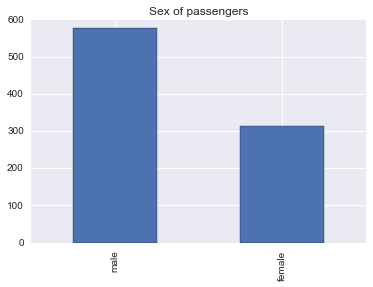

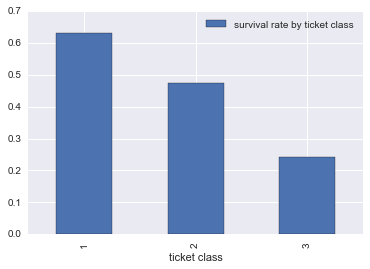

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas has built in methods for simple visualisations
titanic["Sex"].value_counts().plot(kind="bar", title="Sex of passengers") 

# Survival rate analysis by ticket class
titanic_pclass = titanic.groupby(['Pclass']).Survived.value_counts(normalize=True)
titanic_pclass = titanic_pclass[titanic_pclass.index.get_level_values('Survived') == 1]
titanic_pclass = titanic_pclass.reset_index('Pclass')
ax = titanic_pclass.plot(kind='bar', x='Pclass', y='Survived', label='survival rate by ticket class')
ax.set_xlabel('ticket class')

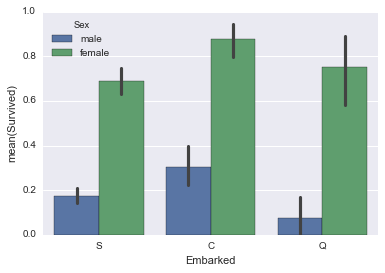

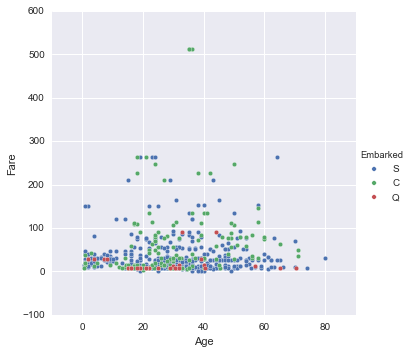

In [35]:
# Seaborn offers concise ways to construct complex charts
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic)
sns.pairplot(x_vars=["Age"], y_vars=["Fare"], data=titanic, hue="Embarked", size=5)

          Survived    Pclass      Fare       Age
Survived  1.000000 -0.338481  0.257307 -0.077221
Pclass   -0.338481  1.000000 -0.549500 -0.369226
Fare      0.257307 -0.549500  1.000000  0.096067
Age      -0.077221 -0.369226  0.096067  1.000000


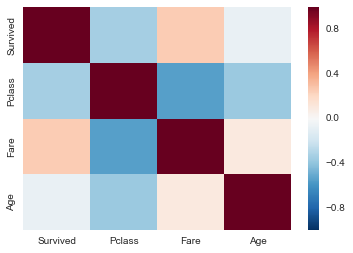

In [37]:
sub_titanic = titanic[['Survived', 'Pclass', 'Fare' , 'Age']]
corr = sub_titanic.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, vmin=-1, vmax=1, cbar=True)

In [ ]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1)
grid.map(plt.hist, 'Age', bins=20)

In [ ]:
import numpy as np

# You can also use matplotlib directly
plt.hist(titanic['Fare'], label="Fare")

X = np.linspace(0, 600)
for d in np.linspace(100, 600, 10):
    plt.plot(X, d + 50 * np.sin(X / 50), linestyle='dotted', linewidth=10)
    
plt.title("Histogram of fares plus squiggles")

## 8. Scikit Learn

Scikit Learn (http://scikit-learn.org) is a brilliant library that contains a bunch of textbook machine learning algorithms, plus machinery for running and evaluating experiments. We're going to use it to build a simple model called a decision tree.

### Cleaning up the data: plugging missing values

In data science and machine learning it is common to spend a lot of time cleaning up and pre-processing data. The Titanic dataset is no expection.

First there are a few values missing from the dataset:

In [ ]:
from sklearn import tree, metrics, preprocessing, model_selection

# Let's work on a copy of the data
train = titanic.copy()

# Here's the problem...
problems = train.isnull().any(axis=1)
print(train[problems].head())
print("Problem rows: {0}".format(train.isnull().any(axis=1).sum()))

We're going to plug some missing values. See https://pandas.pydata.org/pandas-docs/stable/missing_data.html for other ideas. 

In [ ]:
def fill_missing_data(df):
    """Fill in missing values in a few key fields"""
    
    # Replace missing ports of embarkation with 'U'
    df['Embarked'] = df['Embarked'].fillna('U') # For unknown

    # Replace missing ages with the median age
    medianAge = df['Age'].dropna().median()
    df['Age'] = df['Age'].fillna(medianAge)

    # Replace missing cabins with 'U' and strip back to deck letter
    df['Cabin'] = df['Cabin'].fillna('U')
    df['Cabin'] = df['Cabin'].map(lambda cabin: cabin[0])

    medianFare = df['Fare'].dropna().median()
    df['Fare'] = df['Fare'].fillna(medianFare)
    
# Check that it's fixed
fill_missing_data(train)
print(train[problems].head())
print("Problem rows: {0}".format(train.isnull().any(axis=1).sum()))

### Pre-processing the data: encoding nominal data

Now we're going to convert the "categorical" or "nominal" data into numbers. 

Decision trees are actually capable of working with non-numerical data, but unfortunately the Scikit Learn implementation isn't yet!

For our classifier it's okay to just replace each category with a code number. We can do this automatically with Scikit Learn's LabelEncoder. But there are other possibilities that you can read about at http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
encoders = {col: preprocessing.LabelEncoder() for col in "Cabin Embarked Sex".split()}

def encode(df):
    """Encode a few categorical columns"""
    for col, encoder in encoders.items():
         df[col] = encoder.fit_transform(df[col])

encode(train)

# Show the trained encoders
for col, enc in encoders.items():
    print(col, {c:enc.transform([c])[0] for c in enc.classes_})

train.sample(n=5)

In [ ]:
cols = "Pclass Sex Age Fare Cabin Embarked".split()

X = train[cols]
y = train["Survived"]
          
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X, y)
print("Accuracy on training data:", model.score(X, y))
print(metrics.classification_report(model.predict(X), y))

One of the coolest things about decision trees is that it's easy to visualise them and understand their behaviour.

In [ ]:
import graphviz # conda install python-graphviz

dot = tree.export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['Died', 'Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graphviz.Source(dot)

What if we increase the max_depth of the decision tree?

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=10)
model.fit(X, y)
print("Accuracy on training data:", model.score(X, y))
print(metrics.classification_report(model.predict(X), y))

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting.

In [ ]:
t_scores = []
x_scores = []
for depth in range(1,50):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    t_scores.append((depth, model.score(X, y)))
    x_scores.append((depth, model_selection.cross_val_score(model, X, y).mean()))

plt.plot(*zip(*t_scores))
plt.title("Training accuracy")
plt.show()
plt.plot(*zip(*x_scores))
plt.title("Cross-validation accuracy")
plt.show()

So the best value for max_depth is 5.

Finally, we can run a trained model on unseen (or "held out") data. You can use this to submit to https://www.kaggle.com/c/titanic

In [ ]:
best_model = tree.DecisionTreeClassifier(max_depth=5)
best_model.fit(X, y)

# Generate the test set
test = pd.read_csv("https://raw.githubusercontent.com/joehalliwell/ml-workshop/master/test.csv")
fill_missing_data(test)
encode(test)

test.head()

In [ ]:
predictions = pd.DataFrame(best_model.predict(test[cols]), columns=("Survived",))

submission = pd.concat((test['PassengerId'], predictions), axis=1)
submission.to_csv("submission.csv", index=None)
submission.head()

## 9. Over to you!

- Would a different classifier work better? There are tons to try! http://scikit-learn.org/stable/supervised_learning.html
- Join Kaggle and submit your predictions!
- Would a one-hot encoding be better? http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- Try visualising the decision surface: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py 

## 10. References

- Intro to pandas: http://synesthesiam.com/posts/an-introduction-to-pandas.html
- Cheatsheets: https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5 
- Titanic tutorials: https://www.kaggle.com/c/titanic#tutorials

